/tmp/ipykernel_3905/1784284937.py:21: RuntimeWarning: invalid value encountered in sqrt
  rho0sqrderr = (Uerr**2 * ((1 / (U0ref + Uzero))**2 + (-(U0 + Uzero) / (U0ref + Uzero)**2)**2 + ((1 / (U0ref + Uzero)) - ((U0 + Uzero) / (U0ref + Uzero))**2)))**(1/2)
/tmp/ipykernel_3905/1784284937.py:36: RuntimeWarning: invalid value encountered in true_divide
  return (np.sin((x * np.pi / 180)-beta(x * np.pi / 180))/np.sin((x * np.pi / 180)+beta(x * np.pi / 180)))**2
/tmp/ipykernel_3905/1784284937.py:39: RuntimeWarning: invalid value encountered in true_divide
  return 5*(2*(0.0174532925199433 - 0.0107075414232781*np.cos(0.0174532925199433*x)/np.sqrt(1 - 0.376378486205729*np.sin(0.0174532925199433*x)**2))*np.sin(0.0174532925199433*x - np.arcsin(0.613496932515337*np.sin(0.0174532925199433*x)))*np.cos(0.0174532925199433*x - np.arcsin(0.613496932515337*np.sin(0.0174532925199433*x)))/np.sin(0.0174532925199433*x + np.arcsin(0.613496932515337*np.sin(0.0174532925199433*x)))**2 - 2*(0.0174532925199433 + 

[0.0242066  0.0242066  0.02422213 0.02426476 0.02429296 0.02429425
 0.02429425 0.02429572 0.02429572 0.02429591 0.02429591 0.02429591
 0.02429572 0.02429572 0.02429572 0.02429572 0.02429517 0.02429517
 0.02429517 0.02429425 0.02429425 0.02429296 0.02429296 0.02429296
 0.0242913  0.0242913  0.0242913  0.0242913  0.02428928]


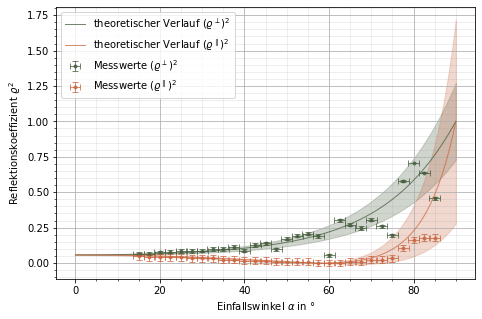

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
from scipy.optimize import curve_fit

input = 'V23.txt'

xo = np.loadtxt(input, float, usecols=0, skiprows=5, delimiter=',')
U0t = np.loadtxt(input, float, usecols=1, skiprows=5, delimiter=',')
U90t = np.loadtxt(input, float, usecols=2, skiprows=5, delimiter=',')

Uzero = 0.02
U0ref = 3.305
U90ref = 1.209
U0 = U0t
U90 = U90t
rho0sqrd = (U0 + Uzero) / (U0ref + Uzero)
rho90sqrd = (U90 + Uzero) / (U90ref + Uzero)
Uerr = 0.02
rho0sqrderr = (Uerr**2 * ((1 / (U0ref + Uzero))**2 + (-(U0 + Uzero) / (U0ref + Uzero)**2)**2 + ((1 / (U0ref + Uzero)) - ((U0 + Uzero) / (U0ref + Uzero))**2)))**(1/2)
#rho0sqrderr = ((Uerr * 1 / (U0ref + Uzero))**2 + (Uerr * (U0 + Uzero) / (U0ref + Uzero)**2)**2 + (Uerr * (1 / (U0 + Uzero) - (U0ref + Uzero) / (U0 + Uzero)**2))**2)**(1/2)
rho90sqrderr = (Uerr**2 * ((1 / (U90ref + Uzero))**2 + (-(U90 + Uzero) / (U90ref + Uzero)**2)**2 + ((1 / (U90ref + Uzero)) - ((U90 + Uzero) / (U90ref + Uzero))**2)))**(1/2)
#rho90sqrderr = ((Uerr / U90ref)**2 + (Uerr * U90 / U90ref**2)**2)**(1/2)

print(rho90sqrderr)

x = (90 - ( xo / 2 ))
xerr = 1.3


def beta(x):
    return np.arcsin(np.sin(x)/1.63)

def f1(x):
    return (np.sin((x * np.pi / 180)-beta(x * np.pi / 180))/np.sin((x * np.pi / 180)+beta(x * np.pi / 180)))**2

def f1err(x):
    return 5*(2*(0.0174532925199433 - 0.0107075414232781*np.cos(0.0174532925199433*x)/np.sqrt(1 - 0.376378486205729*np.sin(0.0174532925199433*x)**2))*np.sin(0.0174532925199433*x - np.arcsin(0.613496932515337*np.sin(0.0174532925199433*x)))*np.cos(0.0174532925199433*x - np.arcsin(0.613496932515337*np.sin(0.0174532925199433*x)))/np.sin(0.0174532925199433*x + np.arcsin(0.613496932515337*np.sin(0.0174532925199433*x)))**2 - 2*(0.0174532925199433 + 0.0107075414232781*np.cos(0.0174532925199433*x)/np.sqrt(1 - 0.376378486205729*np.sin(0.0174532925199433*x)**2))*np.sin(0.0174532925199433*x - np.arcsin(0.613496932515337*np.sin(0.0174532925199433*x)))**2*np.cos(0.0174532925199433*x + np.arcsin(0.613496932515337*np.sin(0.0174532925199433*x)))/np.sin(0.0174532925199433*x + np.arcsin(0.613496932515337*np.sin(0.0174532925199433*x)))**3)

def f2(x):
    return (np.tan((x * np.pi / 180)-beta(x * np.pi / 180))/np.tan((x * np.pi / 180)+beta(x * np.pi / 180)))**2

def f2err(x):
    return 5*(2*(0.0174532925199433 - 0.0107075414232781*np.cos(0.0174532925199433*x)/np.sqrt(1 - 0.376378486205729*np.sin(0.0174532925199433*x)**2))*(np.tan(0.0174532925199433*x - np.arcsin(0.613496932515337*np.sin(0.0174532925199433*x)))**2 + 1)*np.tan(0.0174532925199433*x - np.arcsin(0.613496932515337*np.sin(0.0174532925199433*x)))/np.tan(0.0174532925199433*x + np.arcsin(0.613496932515337*np.sin(0.0174532925199433*x)))**2 - 2*(0.0174532925199433 + 0.0107075414232781*np.cos(0.0174532925199433*x)/np.sqrt(1 - 0.376378486205729*np.sin(0.0174532925199433*x)**2))*(np.tan(0.0174532925199433*x + np.arcsin(0.613496932515337*np.sin(0.0174532925199433*x)))**2 + 1)*np.tan(0.0174532925199433*x - np.arcsin(0.613496932515337*np.sin(0.0174532925199433*x)))**2/np.tan(0.0174532925199433*x + np.arcsin(0.613496932515337*np.sin(0.0174532925199433*x)))**3)

fig, ax = plt.subplots(figsize=(7.5,5))
xplot_1 = np.linspace(0, 90, 10000)

ax.set_xlabel(r'Einfallswinkel $\alpha$ in °')
ax.set_ylabel(r'Reflektionskoeffizient $\varrho^2$')
ax.grid()
ax.grid(which='minor', color='#999999', alpha=0.2, linestyle='-')
ax.minorticks_on()
ax.errorbar(x, rho0sqrd, xerr = xerr, yerr = rho0sqrderr, fmt = '.', color = '#465d3e', alpha = 0.75, linewidth=1, ecolor="#465d3e", capsize=3, label = r'Messwerte $(\varrho^\perp)^2$')
ax.errorbar(x, rho90sqrd, xerr = xerr, yerr = rho90sqrderr, fmt = '.', color = '#cb6640', alpha = 0.75, linewidth=1, ecolor="#cb6640", capsize=3, label = r'Messwerte $(\varrho^\parallel)^2$')
ax.plot(xplot_1, f1(xplot_1), color = '#465d3e', alpha = 0.75, linewidth = 1, label = r'theoretischer Verlauf $(\varrho^\perp)^2$')
plt.fill_between(xplot_1, f1(xplot_1)-f1err(xplot_1), f1(xplot_1)+f1err(xplot_1), color = '#465d3e', alpha = 0.25)
ax.plot(xplot_1, f2(xplot_1), color = '#cb6640', alpha = 0.75, linewidth = 1, label = r'theoretischer Verlauf $(\varrho^\parallel)^2$')
plt.fill_between(xplot_1, f2(xplot_1)-f2err(xplot_1), f2(xplot_1)+f2err(xplot_1), color = '#cb6640', alpha = 0.25)
#plt.xticks([0,np.pi/8,np.pi/4,3*np.pi/8,np.pi/2],[r'$0$',r'$\frac{\pi}{8}$',r'$\frac{\pi}{4}$',r'$\frac{3\pi}{8}$',r'$\frac{\pi}{2}$'])
ax.legend(loc='upper left')
plt.savefig('./23_Reflexionskoeffizient.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

/tmp/ipykernel_3905/1657347314.py:17: RuntimeWarning: invalid value encountered in true_divide
  return value * x / x


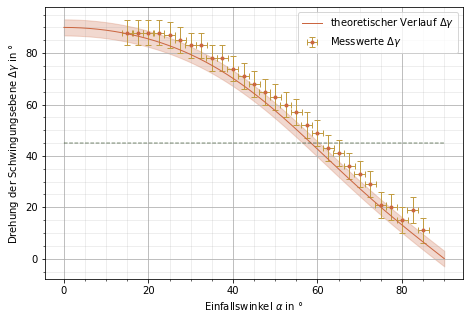

In [36]:
theta = np.loadtxt(input, float, usecols=3, skiprows=5, delimiter=',')
thetaerr = 5

deltagamma = (135 - theta) % 180
deltagammaerr = thetaerr

fig, ax = plt.subplots(figsize=(7.5,5))
xplot_1 = np.linspace(0, 90, 10000)

def deltagammatheo(x):
    return ((np.arctan( -np.cos((x * np.pi / 180) - beta(x * np.pi / 180)) / np.cos((x * np.pi / 180) + beta(x * np.pi / 180))) - (np.pi / 4)) % (np.pi)) * 180 / np.pi

def deltagammatheoerr(x):
    return ((5/180*np.pi)*(-57.2957795130823*((0.0174532925199433 + 0.0107075414232781*np.cos(0.0174532925199433*x)/np.sqrt(1 - 0.376378486205729*np.sin(0.0174532925199433*x)**2))*np.sin(0.0174532925199433*x + np.arcsin(0.613496932515337*np.sin(0.0174532925199433*x)))*np.cos(np.pi*x/180 - np.arcsin(0.613496932515337*np.sin(0.0174532925199433*x)))/np.cos(0.0174532925199433*x +np.arcsin(0.613496932515337*np.sin(0.0174532925199433*x)))**2 - (np.pi/180 - 0.0107075414232781*np.cos(0.0174532925199433*x)/np.sqrt(1 - 0.376378486205729*np.sin(0.0174532925199433*x)**2))*np.sin(np.pi*x/180 - np.arcsin(0.613496932515337*np.sin(0.0174532925199433*x)))/np.cos(0.0174532925199433*x + np.arcsin(0.613496932515337*np.sin(0.0174532925199433*x))))/(1 + np.cos(np.pi*x/180 - np.arcsin(0.613496932515337*np.sin(0.0174532925199433*x)))**2/np.cos(0.0174532925199433*x + np.arcsin(0.613496932515337*np.sin(0.0174532925199433*x)))**2)))%np.pi

def constant(x, value):
    return value * x / x

ax.set_xlabel(r'Einfallswinkel $\alpha$ in °')
ax.set_ylabel(r'Drehung der Schwingungsebene $\Delta\gamma$ in °')
ax.grid()
ax.grid(which='minor', color='#999999', alpha=0.2, linestyle='-')
ax.minorticks_on()
ax.errorbar(x, deltagamma, xerr = xerr, yerr = deltagammaerr, fmt = '.', color = '#cb6640', alpha = 1, linewidth=1, ecolor="#c19d44", capsize=3, label = r'Messwerte $\Delta\gamma$')
ax.plot(xplot_1, deltagammatheo(xplot_1), color = '#cb6640', alpha = 1, linewidth = 1, label = r'theoretischer Verlauf $\Delta\gamma$')
plt.fill_between(xplot_1, deltagammatheo(xplot_1)-deltagammatheoerr(xplot_1), deltagammatheo(xplot_1)+deltagammatheoerr(xplot_1), color = '#cb6640', alpha = 0.25)
ax.plot(xplot_1, constant(xplot_1, 45), color = '#465d3e', alpha = 0.75, linewidth = 1, linestyle = 'dashed', label = r'')
#plt.xticks([0,np.pi/8,np.pi/4,3*np.pi/8,np.pi/2],[r'$0$',r'$\frac{\pi}{8}$',r'$\frac{\pi}{4}$',r'$\frac{3\pi}{8}$',r'$\frac{\pi}{2}$'])
#plt.yticks([0,np.pi/8,np.pi/4,3*np.pi/8,np.pi/2],[r'$0$',r'$\frac{\pi}{8}$',r'$\frac{\pi}{4}$',r'$\frac{3\pi}{8}$',r'$\frac{\pi}{2}$'])
ax.legend()
plt.savefig('./23_DrehungSchwingungsebene.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()